In [3]:
# import statements
import warnings
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from statsmodels.stats.weightstats import ttest_ind

warnings.filterwarnings("ignore")


In [4]:
def stats(nums):  # 1A
    n = len(nums)
    mean = sum(nums) / n
    total_diffs = 0.0
    for num in nums:
        total_diffs = total_diffs + ((num - mean) ** 2.0)  # add squared differences
    sd = (total_diffs / n) ** 0.5  # take square root of variance
    return n, mean, sd


In [5]:
def gene_type(nums, threshold=4.0):  # 1B
    n, mean, sd = stats(nums)
    t_score = (mean - threshold) / (sd / (n ** 0.5))
    df = n - 1
    p_value = t.sf(t_score, df)
    bad = p_value < 0.05
    return bad, t_score, p_value


In [6]:
class GenesAnalyzer:  # Problem 1

    def __init__(self, file_name):
        try:
            self.patients = pd.read_csv(file_name)  # read csv into pandas df
        except FileNotFoundError:
            pass

    @staticmethod
    def stats(nums):  # 1A
        n = len(nums)
        mean = sum(nums) / n
        total_diffs = 0.0
        for num in nums:
            total_diffs = total_diffs + ((num - mean) ** 2.0)  # add squared differences
        sd = (total_diffs / n) ** 0.5  # take square root of variance
        return n, mean, sd
    
    def gene_type(self, nums, threshold=4.0):  # 1B
        n, mean, sd = self.stats(nums)
        t_score = (mean - threshold) / (sd / (n ** 0.5))
        df = n - 1
        p_value = t.sf(t_score, df)
        bad = p_value < 0.05
        return bad, t_score, p_value

    def analyze_gene(self):  # 1C
        genes = self.patients.iloc[1:, 1:].astype(float)  # take all gene expressions
        analyses = genes.apply(self.gene_type, axis=0)  # vectorized operation of gene_type on each column
        # create dataframe from new dictionary containing analyses data
        analyses_df = pd.DataFrame({'Bad?': analyses.iloc[0, :], 'p-value':
            analyses.iloc[2, :], 't-score': analyses.iloc[1, :]})
        return analyses_df

    @staticmethod
    def graph_genes(gene_o, gene_t):  # 1D
        plt.scatter(gene_o, gene_t)
        
        # set ticks incrementing from min to max value of each series
        plt.xticks(ticks=range(int(min(gene_o))-1, int(max(gene_o))+2))
        plt.yticks(ticks=range(int(min(gene_t))-1, int(max(gene_t))+2))
        
        # set title and labels
        plt.title("Gene 1 vs Gene 2 Comparison")
        plt.xlabel('Gene 1')
        plt.ylabel('Gene 2')
        plt.show()
        

sample_0      0.252464
sample_1      0.732241
sample_2     -4.400124
sample_3      0.161268
sample_4      0.465362
sample_5     -4.571757
sample_6      8.328873
sample_7      1.369165
sample_8     -6.956517
sample_9      2.282768
sample_10    -5.873408
sample_11     2.935423
sample_12     4.792978
sample_13    -5.103412
sample_14     3.816881
sample_15     1.063905
sample_16     3.110301
sample_17     8.483965
sample_18    -2.226941
sample_19    -4.768681
sample_20    -5.447572
sample_21    -5.079051
sample_22    -1.385509
sample_23      0.70576
sample_24     0.383454
sample_25     3.135916
sample_26    -0.934991
sample_27      6.26767
sample_28    -2.323284
sample_29    12.600846
sample_30     2.128337
sample_31    -5.285788
sample_32    -6.354462
sample_33     1.412362
sample_34    -2.117314
sample_35     2.570002
sample_36     1.366188
sample_37    -1.364145
sample_38    -5.233969
sample_39    -8.574236
sample_40    -3.232575
sample_41     3.281994
sample_42     0.070469
sample_43  

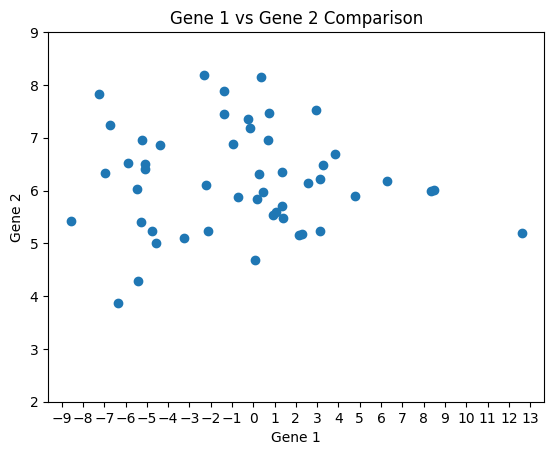

,Bad?,p-value,t-score
sample_0,False,0.961874,-2.139043
sample_1,False,0.169794,1.037285
sample_2,False,0.118818,1.311506
sample_3,False,0.12006,1.303698
sample_4,False,0.953124,-1.989721
sample_5,False,0.806755,-0.933706
sample_6,False,0.072517,1.674602
sample_7,False,0.88099,-1.310292
sample_8,False,0.362007,0.370108
sample_9,False,0.100529,1.435861


In [9]:
# Problem 1 Output Code
file_name = '/Users/Arjun/Documents/EDIT ML App/1_c_d.csv'
analyzer = GenesAnalyzer(file_name)

# get gene expressions

'''gene_one = analyzer.patients.loc['gene_0', :]
gene_two = analyzer.patients.loc['gene_1', :]'''
gene_one = analyzer.patients.iloc[3, 1:]#.astype(int)
gene_two = analyzer.patients.iloc[7, 1:]#.astype(int)
'''
gene_a = patients.iloc[0][1:].astype(float)
gene_b = patients.iloc[3][1:].astype(float)'''
print(gene_one)
print(analyzer.patients)

analyzer.graph_genes(gene_one, gene_two)
analyzer.analyze_gene()

In [56]:
class DiseaseSubtype:  # 2A
    
    def __init__(self, file_name):
        self.y, self.X = self.load_data(file_name)
        
    @staticmethod
    def load_data(file_name):
        patients = pd.read_csv(file_name)
        y = patients.to_numpy()[:, 0].astype(str) # set y to an ndarray of target variables (ALL or AML) 
        y = np.where(np.char.find(y, 'ALL') != -1, 0, 1).astype(int)  # set variables to 0 or 1
        X = StandardScaler().fit_transform(patients.iloc[:, 1:])  # scale to reduce bias
        return y, X
    
    def plot(self):
        pca = PCA(n_components=2)
        X_PCA = pca.fit_transform(self.X)
        subtype_assignments = np.where(self.y == 0, 'ALL (Lymphoid)', 'AML (Myeloid)')  # ALL if 0 else 1
        plt.figure(figsize=(8, 6))
        
        for subtype in np.unique(subtype_assignments):
            self.scatter(X_PCA, subtype_assignments, subtype)
            
        plt.title('Leukemia Patient Clustering Based on Gene Expression Profiles')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(title='Disease Subtypes')
        plt.show()
        
    @staticmethod
    def scatter(X, subtype_assignments, subtype):
        # filter our non-matching lineage from X
        x_coords_all = X[subtype_assignments == subtype, 0]
        y_coords_all = X[subtype_assignments == subtype, 1]
        plt.scatter(x_coords_all, y_coords_all, label=subtype)
        
    def assess_subtype(self):
        knn = KNeighborsClassifier(n_neighbors=9)
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.15, random_state=42)
        knn.fit(X_train, y_train)
        return 100 * knn.score(X_test, y_test)
        

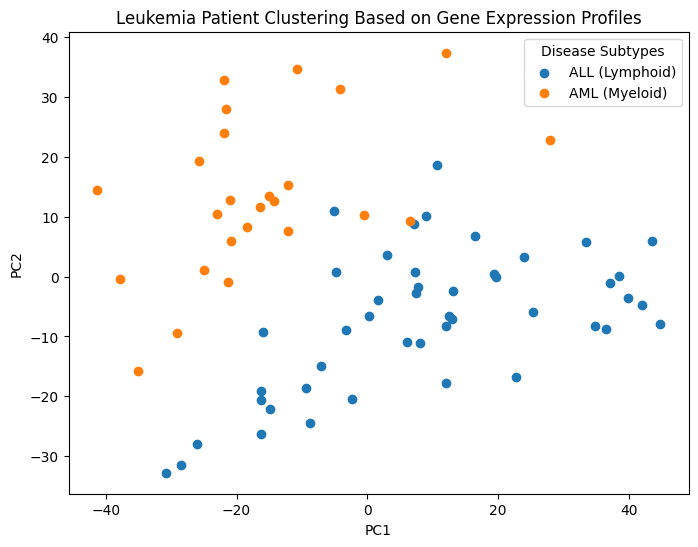

Subtype Assessment Accuracy: 100.0%


In [57]:
file_name = '/Users/Arjun/Documents/EDIT ML App/2_a.csv'
analyzer = DiseaseSubtype(file_name)
analyzer.plot()
print('Subtype Assessment Accuracy: ' + str(analyzer.assess_subtype()) + '%')

In [11]:
class CellAnalyzer:  # 2B

    def __init__(self, file_path, case_count=10):
        self.case_count = case_count
        self.threshold_ratio = 0.3
        self.ratios = []
        self.masks = []
        self.masks_ratios = []
        self.process_cells(file_path)
    
    def process_cells(self, file_path):
        for i in range(self.case_count):
            cell = img.imread(f'{file_path}{i}.png')
            right_cell = cell[:, cell.shape[1] // 2:, :]  # right half of img (mask)
            left_cell = cell[:, :cell.shape[1] // 2, :]  # left half of img (original cell(s))
            self.ratios.append(self.calc_ratios(right_cell))
            self.masks.append(self.segment_cell(left_cell))
            self.masks_ratios.append((self.calc_ratios(self.masks[i])))

    @staticmethod
    def calc_ratios(cell):
        # boolean series checking if pixels match white/green
        w = np.all(cell == (1, 1, 1), axis=2)
        g = np.all(cell == (0, 1, 0), axis=2)
        
        white = np.sum(w)
        green = np.sum(g)
        
        blue = cell.shape[0]*cell.shape[1] - white - green  # find blue from pixels not green or white
        return blue / (green + blue)
    
    @staticmethod
    def analyze_cell(ratios):
        _, tscore, pval = GenesAnalyzer('').gene_type(ratios, 0.3)
        return ('Malignant? ' + ('False' if pval > 0.05 else 'True') + '    t-score: ' + str(tscore) +
                '    p-value: ' + str(pval))

    @staticmethod
    def segment_cell(cell):
        cell_reshape = cell.reshape(-1, 3)  # reshape to contain 3 elements per row
        km = KMeans(n_clusters=3, random_state=42).fit(cell_reshape)  # train kmeans model
        segmented_image = km.cluster_centers_[km.labels_]  # reconfigure pixels to match cluster centers
        
        # match each center to white or green
        white_val = km.cluster_centers_[np.argmin(distance.cdist(km.cluster_centers_,[[1, 1, 1]]))]
        green_val = km.cluster_centers_[np.argmin(distance.cdist(km.cluster_centers_,[[0, 1, 0]]))]
        
        # set each matching point to the cluster value
        segmented_image[(segmented_image == green_val).all(axis=1)] = (0, 0, 1)
        segmented_image[(segmented_image == white_val).all(axis=1)] = (1, 1, 1)
        segmented_image[segmented_image[:, 2] != 1] = (0, 1, 0)
        
        segmented_image = segmented_image.reshape(cell.shape)  # convert image back to original shape
        return segmented_image
    
    def compare_segmentations(self):
        pval = ttest_ind(self.masks_ratios, self.ratios)[1]
        t_score = ttest_ind(self.masks_ratios, self.ratios)[0]
        return 'Statistically Different? ' + ('True' if pval < 0.05 else 'False') + '    t-score: ' + str(t_score) +                 '    p-value: ' + str(pval)
        
    def show_masks(self):
        for i in range(self.case_count):
            plt.imshow(self.masks[i])
            plt.show()
            

Pre-masked ratios:   Malignant? False    t-score: -0.4182643301638333    p-value: 0.6558564837822665
Self-masked ratios:   Malignant? True    t-score: 4.096883089969537    p-value: 0.0022955039437370776
Statistically Different? True    t-score: 2.5029118111784396    p-value: 0.025323789506778417


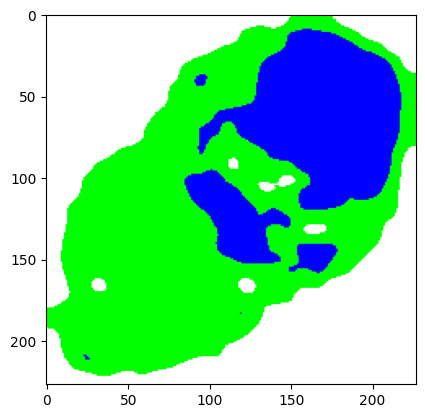

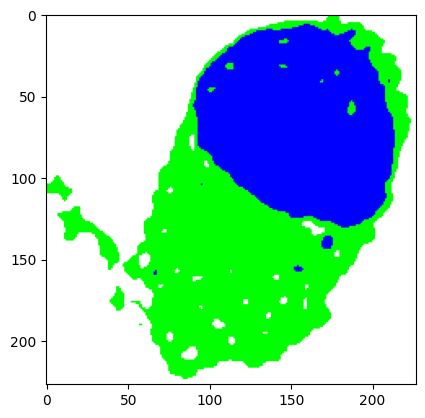

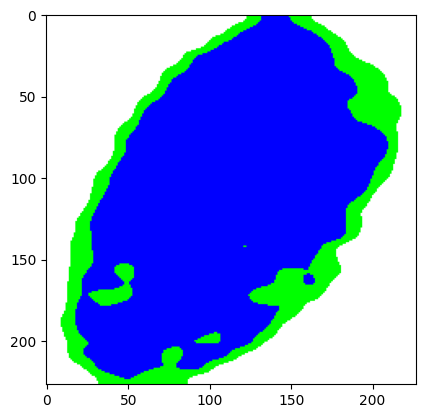

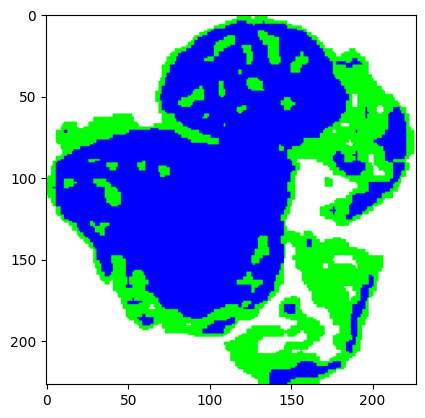

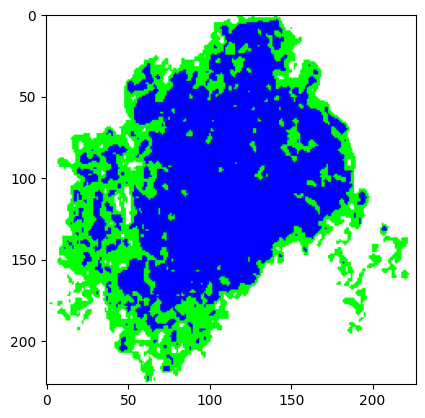

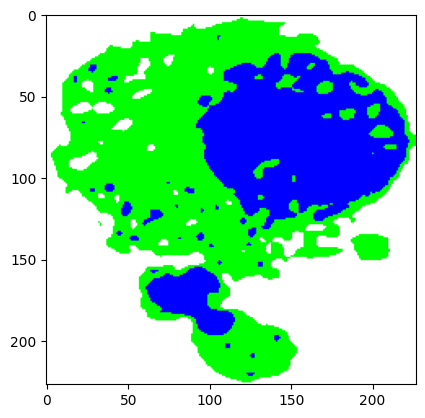

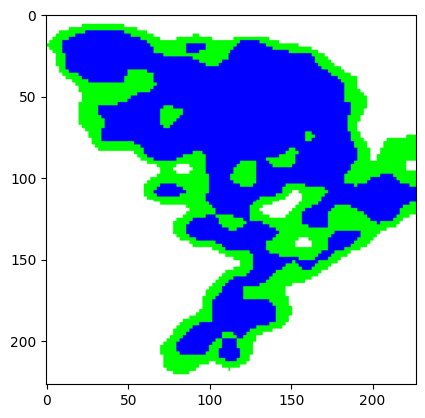

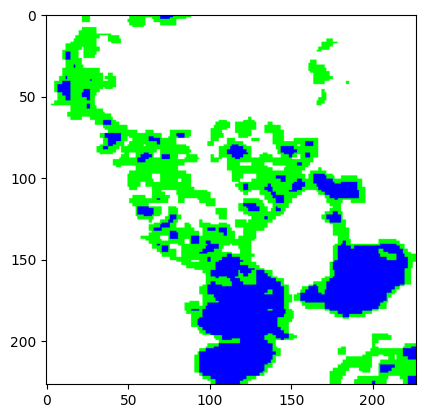

In [12]:
file_path = '/Users/Arjun/Documents/EDIT ML App/2B Test Cases/'
analyzer = CellAnalyzer(file_path, case_count=8)
print('Pre-masked ratios:   ' + analyzer.analyze_cell(analyzer.ratios))
print('Self-masked ratios:   ' + analyzer.analyze_cell(analyzer.masks_ratios))
print(analyzer.compare_segmentations())
analyzer.show_masks()

In [60]:
'''
First Cell:
    - Downloads libraries
Second Cell:
    - Fetches all of 20 Newsgroups dataset, while ensuring samples are randomized and randomization is reproducible
Third Cell:
    - Returns number of documents in the dataset in an f-string
    - Returns number of categories in the document in an f-string
Fourth Cell:
    - Retrieves attribute containing names of the categories/topics in the dataset
Fifth Cell:
    - Iterates over first three documents with each element being in the form of index, document
    - Retrieves category of current document
    - Prints first 500 characters of each document while displaying its category
Sixth Cell:
    - Creates a list of category names for each target label
    - Creates a pandas DataFrame containing a single column, comprised of the category names
Seventh Cell:
    - Creates a matrix of token counts, each row representing a document and each column representing a unique word, with English stopwords removed and the minimum word count being 5
    - Creates a matrix of the counts of each word in the document vocabulary, each row representing a document and each column representing a word count
Eighth Cell:
    - Displays contents of 'word_doc_matrix'
Ninth Cell:
    - Dimensionality of 'word_doc_matrix' reduced to 2 dimensions for visualization purposes using Hellinger distance
Tenth Cell:
    - Displays shape of embedded dimension-reduced data
Eleventh Cell:
    - Creates a scatterplot of embedded datapoints, with labels displayed alongside data points
Twelfth Cell:
    - Copy of Seventh Cell, but utilizes TfidfVectorizer instead of CountVectorizer to create a matrix using td-idf weighting
Thirteenth Cell:
    - Displays content of 'tdif_word_doc_matrix'
Fourteenth Cell:
    - Copy of Ninth Cell, but uses tdidf_word_doc_matrix
Fifteenth Cell:
    - Copy of Eleventh Cell, but uses tdidf_word_doc_matrix
'''

"\nFirst Cell:\n    - Downloads libraries\nSecond Cell:\n    - Fetches all of 20 Newsgroups dataset, while ensuring samples are randomized and randomization is reproducible\nThird Cell:\n    - Returns number of documents in the dataset in an f-string\n    - Returns number of categories in the document in an f-string\nFourth Cell:\n    - Retrieves attribute containing names of the categories/topics in the dataset\nFifth Cell:\n    - Iterates over first three documents with each element being in the form of index, document\n    - Retrieves category of current document\n    - Prints first 500 characters of each document while displaying its category\nSixth Cell:\n    - Creates a list of category names for each target label\n    - Creates a pandas DataFrame containing a single column, comprised of the category names\nSeventh Cell:\n    - Creates a matrix of token counts, each row representing a document and each column representing a unique word, with English stopwords removed and the mini